<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>GIRON, JERIC S.<br>
    201913397 <br>
   58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [143]:
import pandas as pd

In [153]:
## Saving those files here to view datas in this notebook.
file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [154]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [155]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
Prices_mat = np.array(df_prices)[0] ## reshape this vector to the appropriate size
prices_mat = Prices_mat.reshape((12,1)) ##Reshaping it using np.reshape() function. 
Costs_mat = np.array(df_prices)[1] ## reshape this vector to the appropriate size
costs_mat = Costs_mat.reshape((12,1)) ##Reshaping it using np.reshape() function.


## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12, 1)
(12, 1)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [156]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sales_mat * prices_mat
    monthly_costs = sales_mat * costs_mat
    monthly_profits = monthly_revenue - monthly_costs  
    
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [157]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
### print the values

In [158]:
print(f' \t\t\t Monthly Revenue: \n\n{month_rev}\n')  
print(f' \t\t\t Monthly Costs: \n\n{month_cost}\n')
print(f' \t\t\t Monthly Profits: \n\n{month_profit}\n')


 			 Monthly Revenue: 

[ 27335  18340  12740   5495  31290   1960   3115   1435    805   2730
   8085  31465   5250   8100   8600    800   3075     25     75      0
     25    150   7800  13700  11980  13480  17080    280   9340   1560
    720    960   1500   1960  15620  32040   4340   3920   3990    805
   6930    420   1120   1435    805   1260  10500  19810  32250  24900
  44250   4900   8850   4900   2150   4800   1300   3550  27450  44850
   8400  14880  14760   3120   6520   1040   1800    880   2160   1640
   8280  18240  39240  15200   6160    560   5880    600   3920   1320
    920   1440  22080  25320  21510  20790  15930   2205   4005      0
     45      0     45    360  15075   9630  17940   6090   1080   2880
  23670    120    150      0    240      0  23670  13740  12960   4920
   1920   1280   2600   2960   3120   1800   3560   4000  25280   9240
  20610  18540   3510   3510   3510    315    135    360     90     45
  14535  25380  35010  26370  29025   4500  44415   2

In [159]:
A = np.sum(month_profit[0::12]) 
print(f'The Profit For The Month Of January Is: {A} Php')
B = np.sum(month_profit[1::12])
print(f'The Profit For The Month Of February Is: {B} Php')
C = np.sum(month_profit[2::12])
print(f'The Profit For The Month Of March Is: {C} Php')
D= np.sum(month_profit[3::12])
print(f'The Profit For The Month Of April Is: {D} Php')
E= np.sum(month_profit[4::12])
print(f'The Profit For The Month Of May Is: {E} Php')
F = np.sum(month_profit[5::12])
print(f'The Profit For The Month Of June Is: {F} Php')
G = np.sum(month_profit[6::12])
print(f'The Profit For The Month Of July Is: {G} Php')
H = np.sum(month_profit[7::12])
print(f'The Profit For The Month Of August Is: {H} Php')
I = np.sum(month_profit[8::12])
print(f'The Profit For The Month Of September Is: {I} Php')
J = np.sum(month_profit[9::12])
print(f'The Profit For The Month Of October Is: {J} Php')
K = np.sum(month_profit[10::12])
print(f'The Profit For The Month Of November Is: {K} Php')
L = np.sum(month_profit[1::12])
print(f'The Profit For The Month Of December Is: {L} Php')

The Profit For The Month Of January Is: 79371 Php
The Profit For The Month Of February Is: 59208 Php
The Profit For The Month Of March Is: 53850 Php
The Profit For The Month Of April Is: 10001 Php
The Profit For The Month Of May Is: 52824 Php
The Profit For The Month Of June Is: 5527 Php
The Profit For The Month Of July Is: 5598 Php
The Profit For The Month Of August Is: 5498 Php
The Profit For The Month Of September Is: 5034 Php
The Profit For The Month Of October Is: 7213 Php
The Profit For The Month Of November Is: 76548 Php
The Profit For The Month Of December Is: 59208 Php


## Part 2: Flavor Sales

In [160]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = sales_mat * prices_mat ##Same formulas I used.
    flavor_costs = sales_mat * costs_mat
    flavor_profits = flavor_revenue - flavor_costs  
    return flavor_profits.flatten()


In [161]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
### print the values

In [162]:
print(f' \t\t\t Flavor Sales: \n\n{flavor_profit}\n')  

 			 Flavor Sales: 

[ 7810  5240  3640  1570  8940   560   890   410   230   780  2310  8990
  2100  3240  3440   320  1230    10    30     0    10    60  3120  5480
  5990  6740  8540   140  4670   780   360   480   750   980  7810 16020
  1860  1680  1710   345  2970   180   480   615   345   540  4500  8490
  9675  7470 13275  1470  2655  1470   645  1440   390  1065  8235 13455
  1890  3348  3321   702  1467   234   405   198   486   369  1863  4104
  9810  3800  1540   140  1470   150   980   330   230   360  5520  6330
  9560  9240  7080   980  1780     0    20     0    20   160  6700  4280
  8970  3045   540  1440 11835    60    75     0   120     0 11835  6870
  4860  1845   720   480   975  1110  1170   675  1335  1500  9480  3465
  5954  5356  1014  1014  1014    91    39   104    26    13  4199  7332
 10892  8204  9030  1400 13818   882   504  1246  1092  1386 10976 32340]



In [163]:
A = np.sum(flavor_profit[0:12])
print(f'The Profit Of Red Velvet For The Whole Year Is: {A} Php')
B = np.sum(flavor_profit[12:24])
print(f'The Profit Of Oreo For The Whole Year Is: {B} Php')
C = np.sum(flavor_profit[24:36])
print(f'The Profit Of Sugar Glared For The Whole Year Is: {C} Php')
D = np.sum(flavor_profit[36:48])
print(f'The Profit Of Almond Honey For The Whole Year Is: {D} Php')
E = np.sum(flavor_profit[48:60])
print(f'The Profit Of Matcha For The Whole Year Is: {E} Php')
F = np.sum(flavor_profit[60:72])
print(f'The Profit Of Strawberry Cream For The Whole Year Is: {F} Php')
G = np.sum(flavor_profit[72:84])
print(f'The Profit Of Brown Sugar Boba For The Whole Year Is: {G} Php')
H = np.sum(flavor_profit[84:96])
print(f'The Profit Of Fruits And Nuts For The Whole Year Is: {H} Php')
I = np.sum(flavor_profit[96:108])
print(f'The Profit Of Dark Chocolate For The Whole Year Is: {I} Php')
J = np.sum(flavor_profit[108:120])
print(f'The Profit Of Chocolate And Orange For The Whole Year Is: {J} Php')
K = np.sum(flavor_profit[120:132])
print(f'The Profit Of Choco Mint For The Whole Year Is: {K} Php')
L = np.sum(flavor_profit[132:144])
print(f'The Profit OF Choco Butter Naught For The Whole Year Is: {L} Php')


The Profit Of Red Velvet For The Whole Year Is: 41370 Php
The Profit Of Oreo For The Whole Year Is: 19040 Php
The Profit Of Sugar Glared For The Whole Year Is: 53260 Php
The Profit Of Almond Honey For The Whole Year Is: 23715 Php
The Profit Of Matcha For The Whole Year Is: 61245 Php
The Profit Of Strawberry Cream For The Whole Year Is: 18387 Php
The Profit Of Brown Sugar Boba For The Whole Year Is: 30660 Php
The Profit Of Fruits And Nuts For The Whole Year Is: 39820 Php
The Profit Of Dark Chocolate For The Whole Year Is: 44790 Php
The Profit Of Chocolate And Orange For The Whole Year Is: 27615 Php
The Profit Of Choco Mint For The Whole Year Is: 26156 Php
The Profit OF Choco Butter Naught For The Whole Year Is: 91770 Php


In [164]:
flavors = [                      
             ('Red Velvet',A),
             ('Oreo',B),
             ('Sugar Glared',C),
             ('Almond Honey',D),
             ('Matcha',E),
             ('Strawberry Cream',F),
             ('Brown Sugar Boba',G),
             ('Fruits And Nuts',H),
             ('Dark Chocolate',I),
             ('Chocolate And Orange',J),
             ('Choco Mint',K),
             ('Choco Butter Naught',L)
]

In [188]:
Best_three_flavors = sorted(flavors, key=lambda x: x[1], reverse=True)[:3]
best_selling = []

for best_three_flavors in Best_three_flavors:
    best_selling.append(best_three_flavors [0])

print("The Top 3 Best Selling Flavors: ")
best_selling

The Top 3 Best Selling Flavors: 


['Choco Butter Naught', 'Matcha', 'Sugar Glared']

In [189]:
worst_three_flavors = sorted(flavors, key=lambda x: x[1], reverse=False)[:3]
least_selling = []

for worst_three_flavors in worst_three_flavors:
    least_selling.append(worst_three_flavors [0])

print("The Top 3 Worst Selling Flavors: ")
least_selling

The Top 3 Worst Selling Flavors: 


['Strawberry Cream', 'Oreo', 'Almond Honey']

## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [167]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

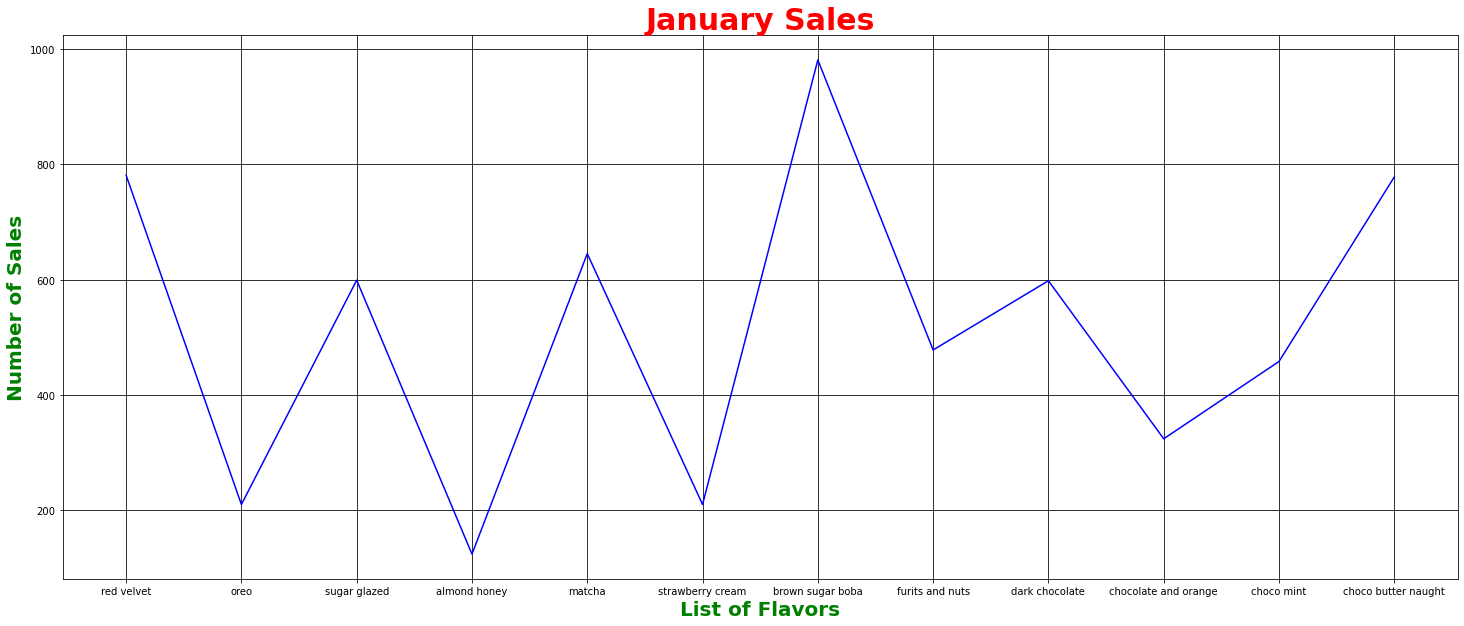

In [168]:
plt.figure(figsize=(25,10))
plt.title('January Sales', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.january, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

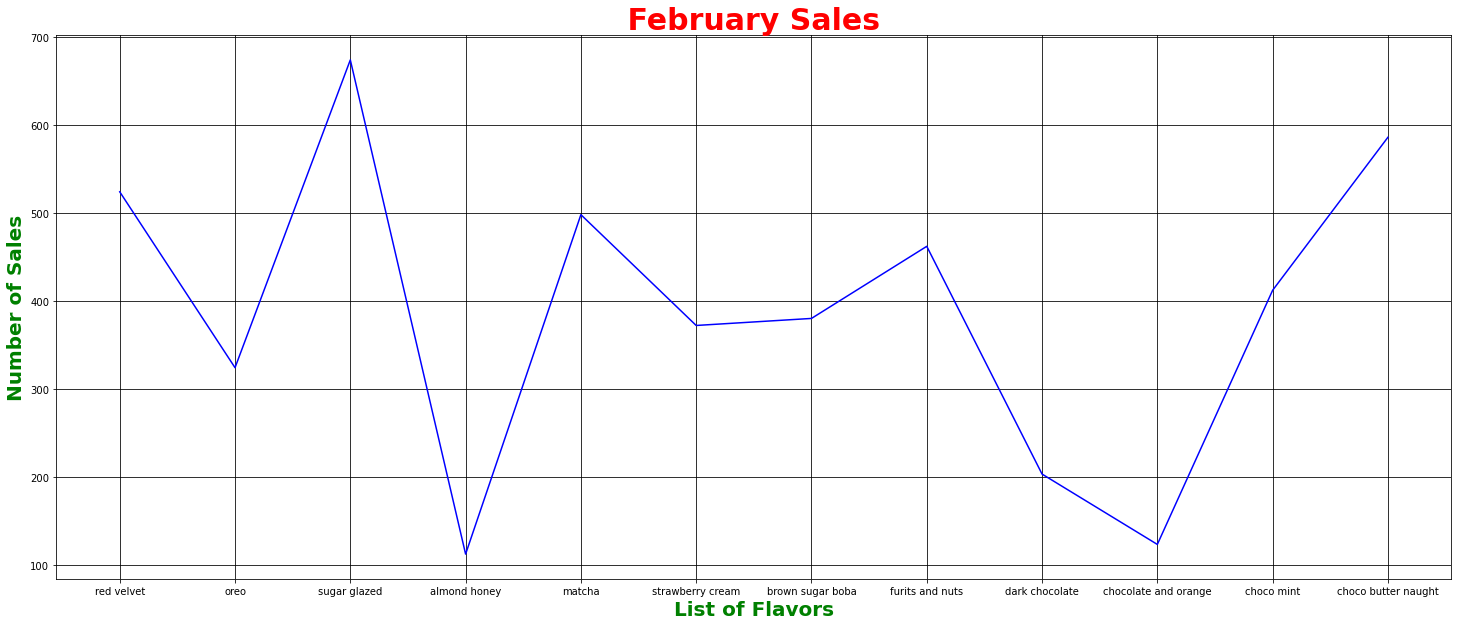

In [169]:
plt.figure(figsize=(25,10))
plt.title(' February Sales ', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.february, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

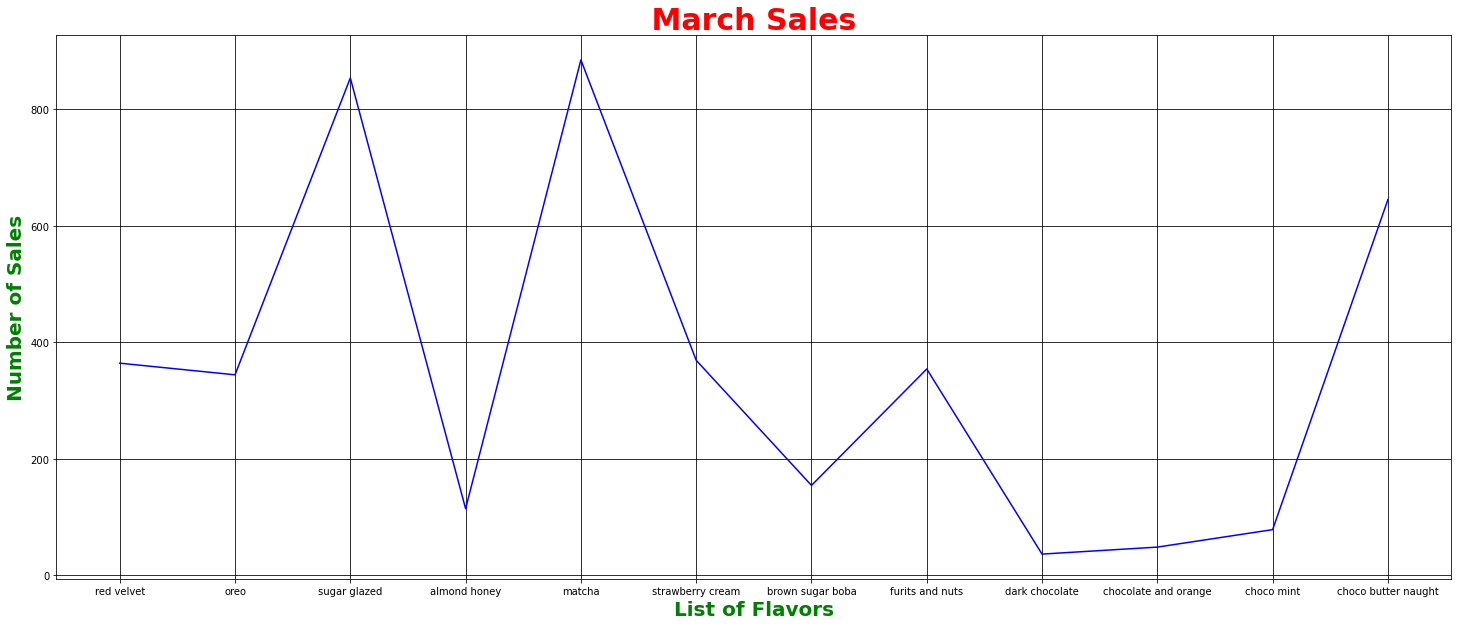

In [170]:
plt.figure(figsize=(25,10))
plt.title(' March Sales ', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.march, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

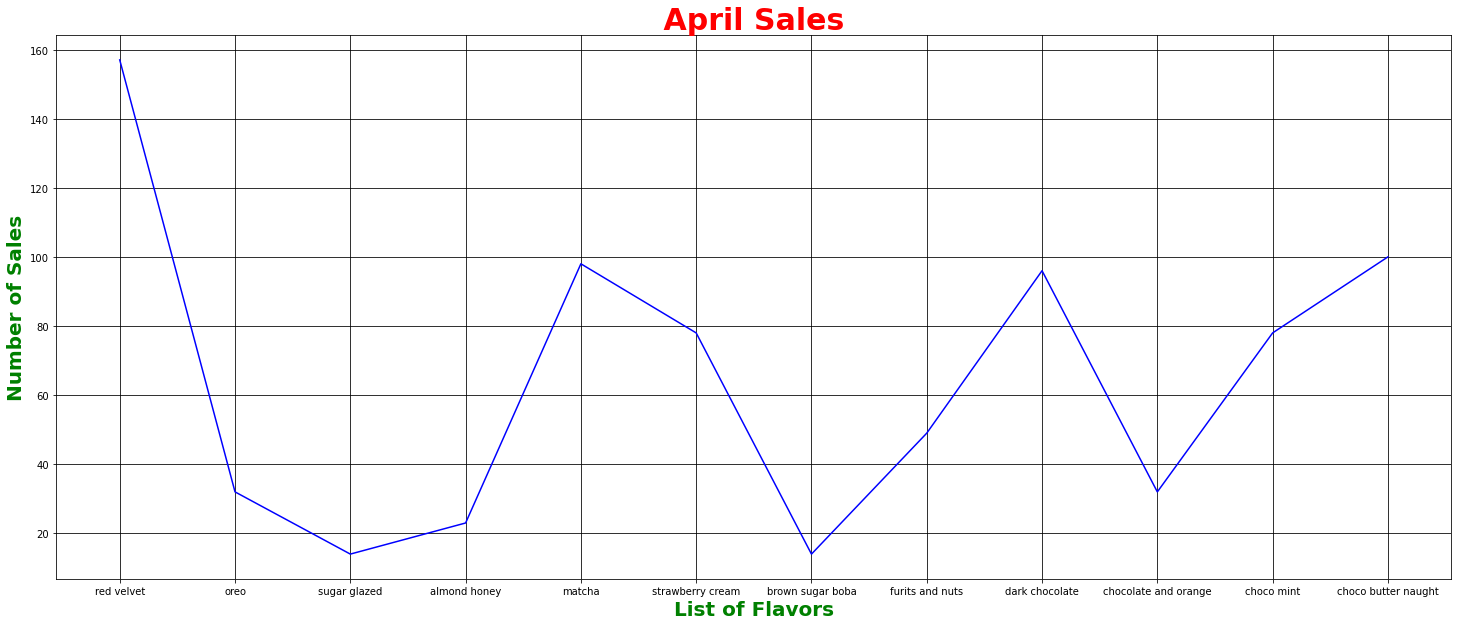

In [171]:
plt.figure(figsize=(25,10))
plt.title(' April Sales ', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.april, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

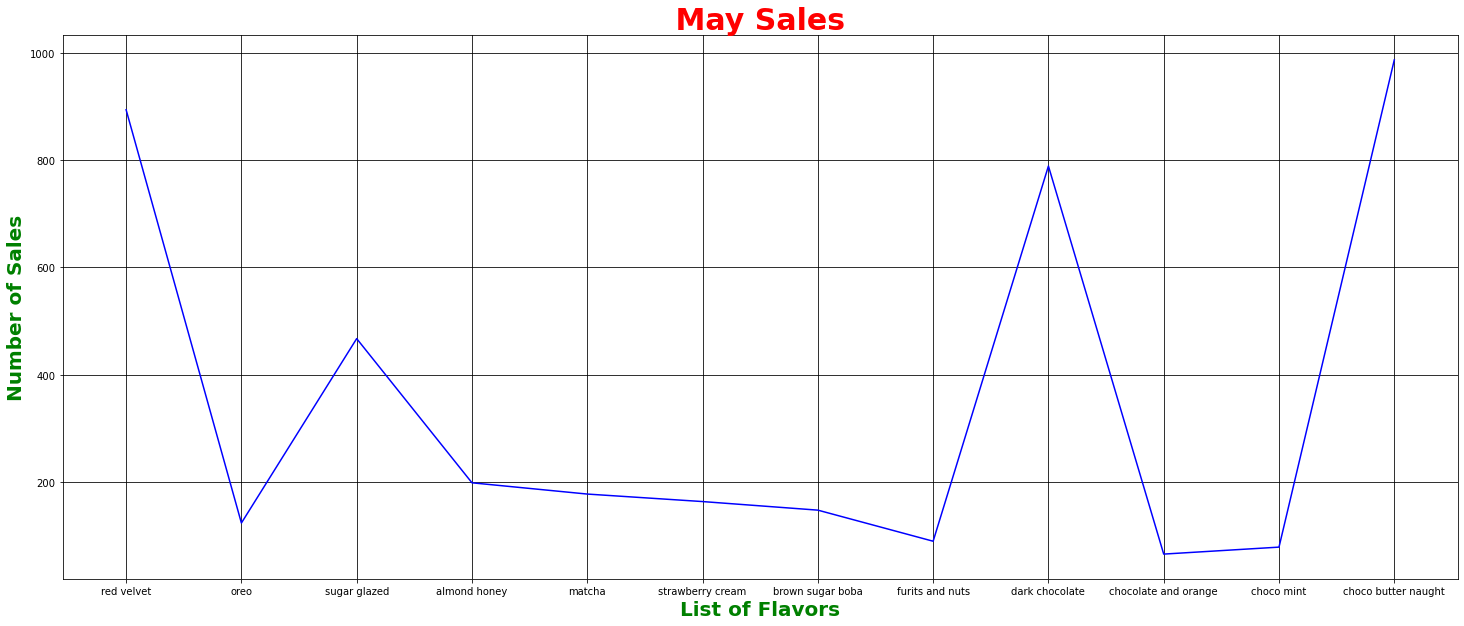

In [172]:
plt.figure(figsize=(25,10))
plt.title(' May Sales ', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.may, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

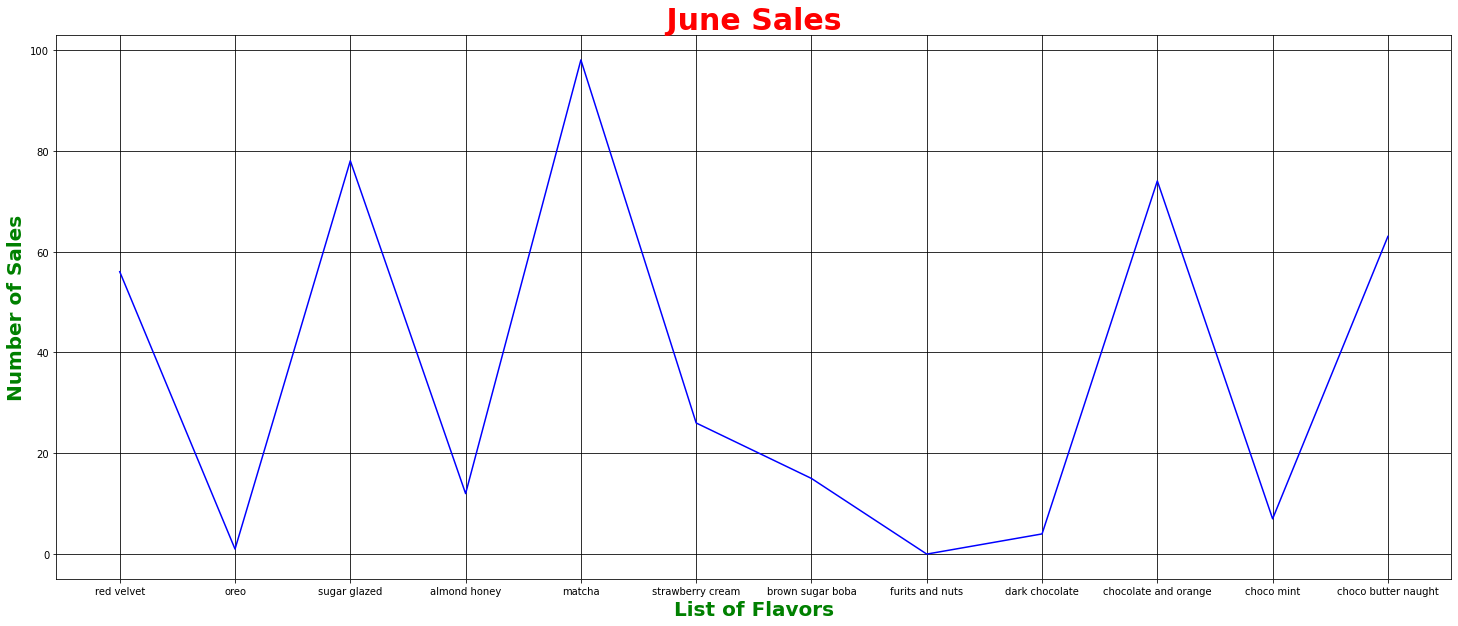

In [173]:
plt.figure(figsize=(25,10))
plt.title(' June Sales ', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.june, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

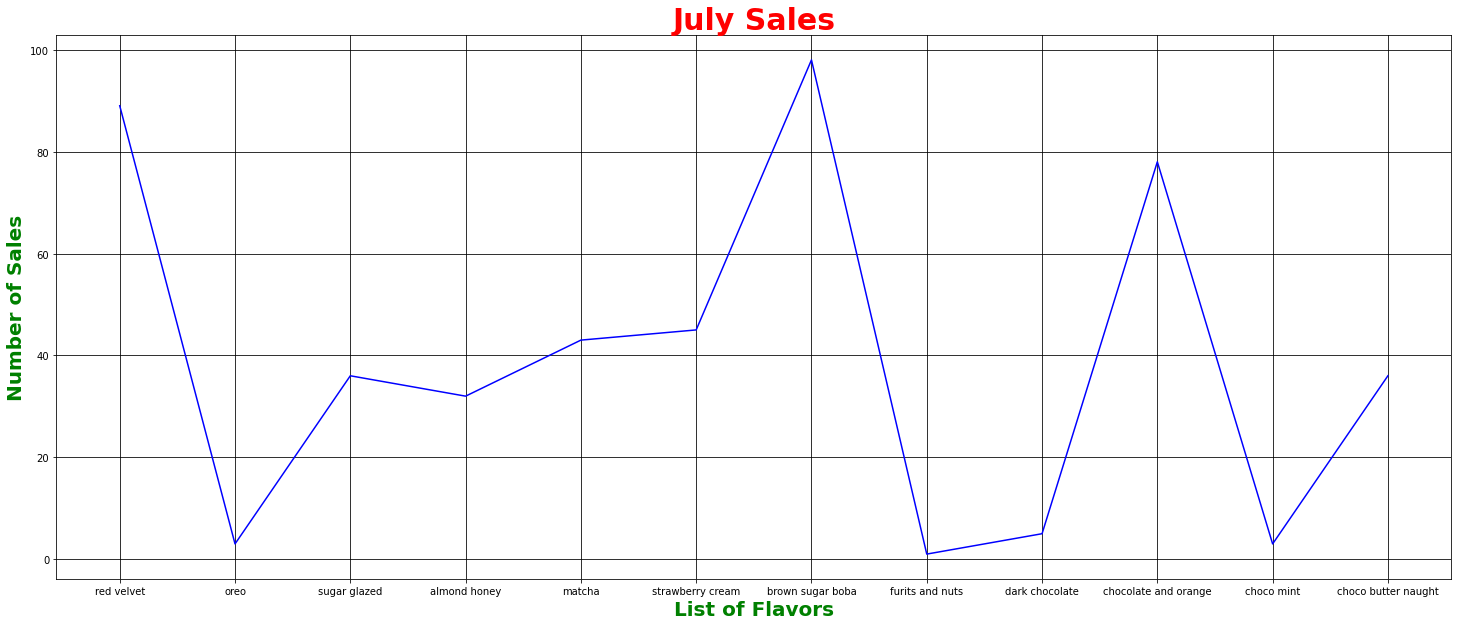

In [174]:
plt.figure(figsize=(25,10))
plt.title('July Sales', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.july, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

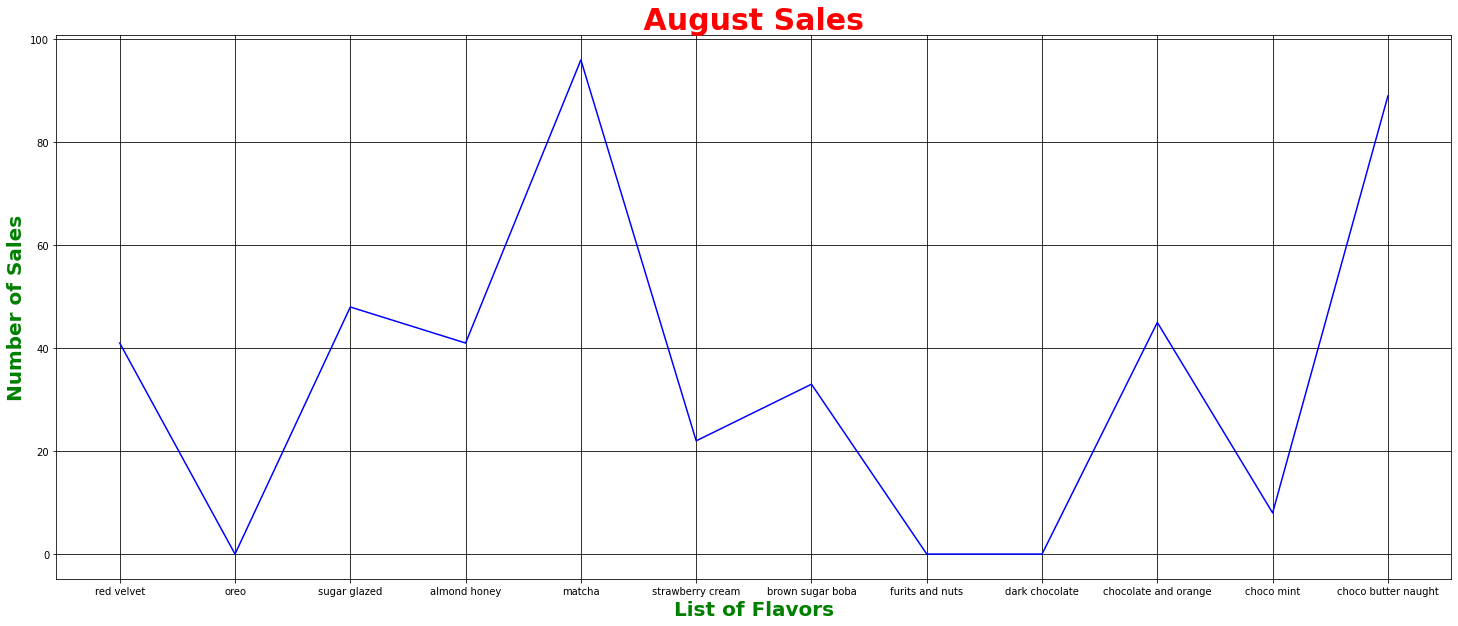

In [175]:
plt.figure(figsize=(25,10))
plt.title(' August Sales ', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.august, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

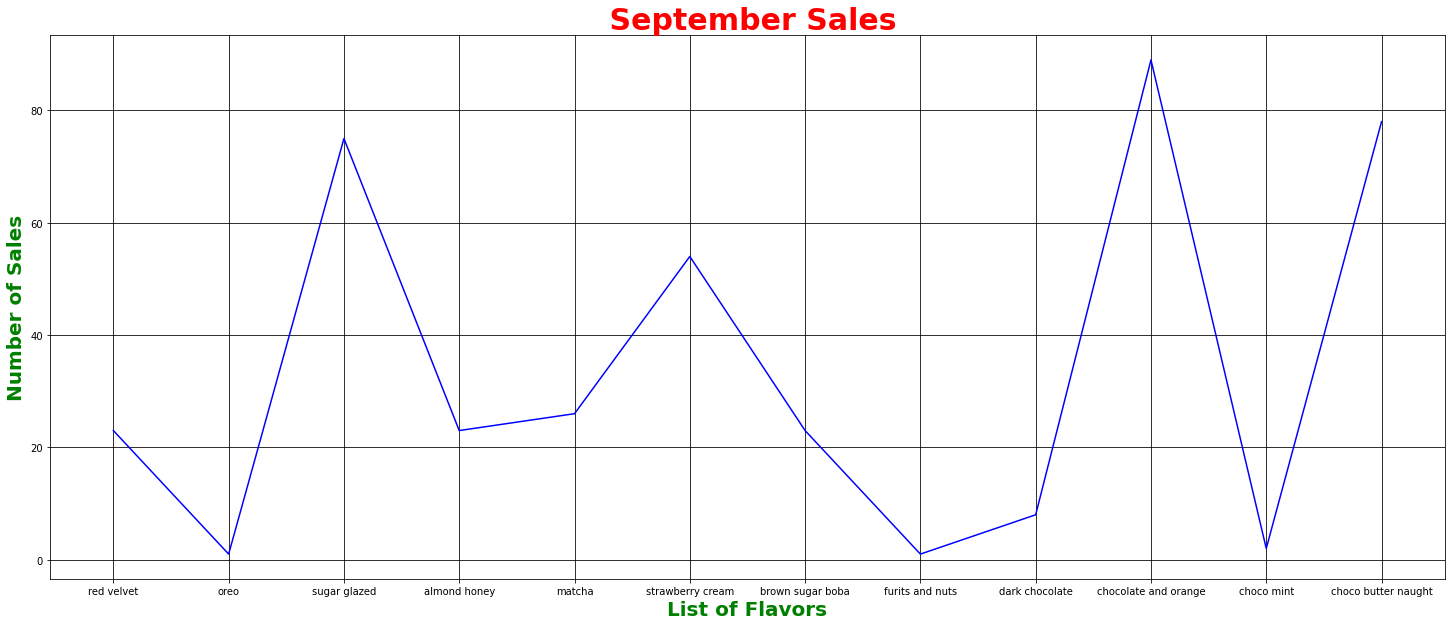

In [176]:
plt.figure(figsize=(25,10))
plt.title(' September Sales', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.september, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

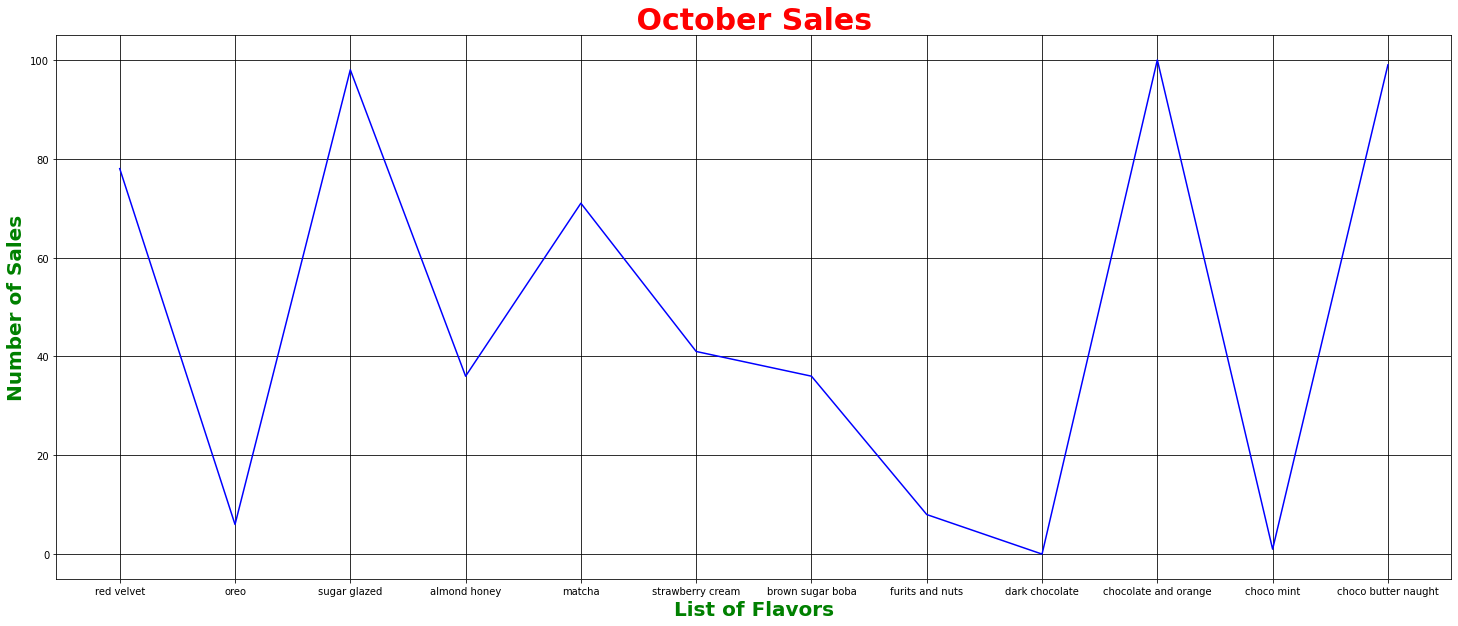

In [177]:
plt.figure(figsize=(25,10))
plt.title(' October Sales ', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.october, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

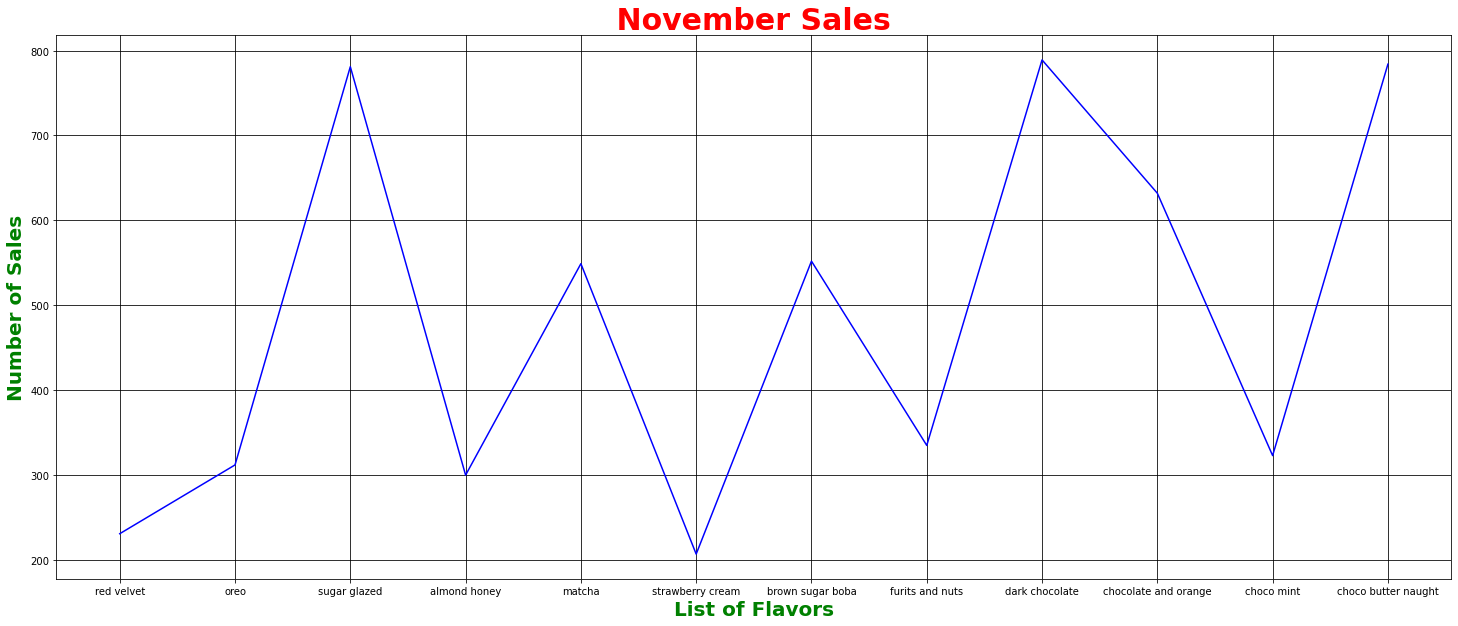

In [178]:
plt.figure(figsize=(25,10))
plt.title(' November Sales ', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.november, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

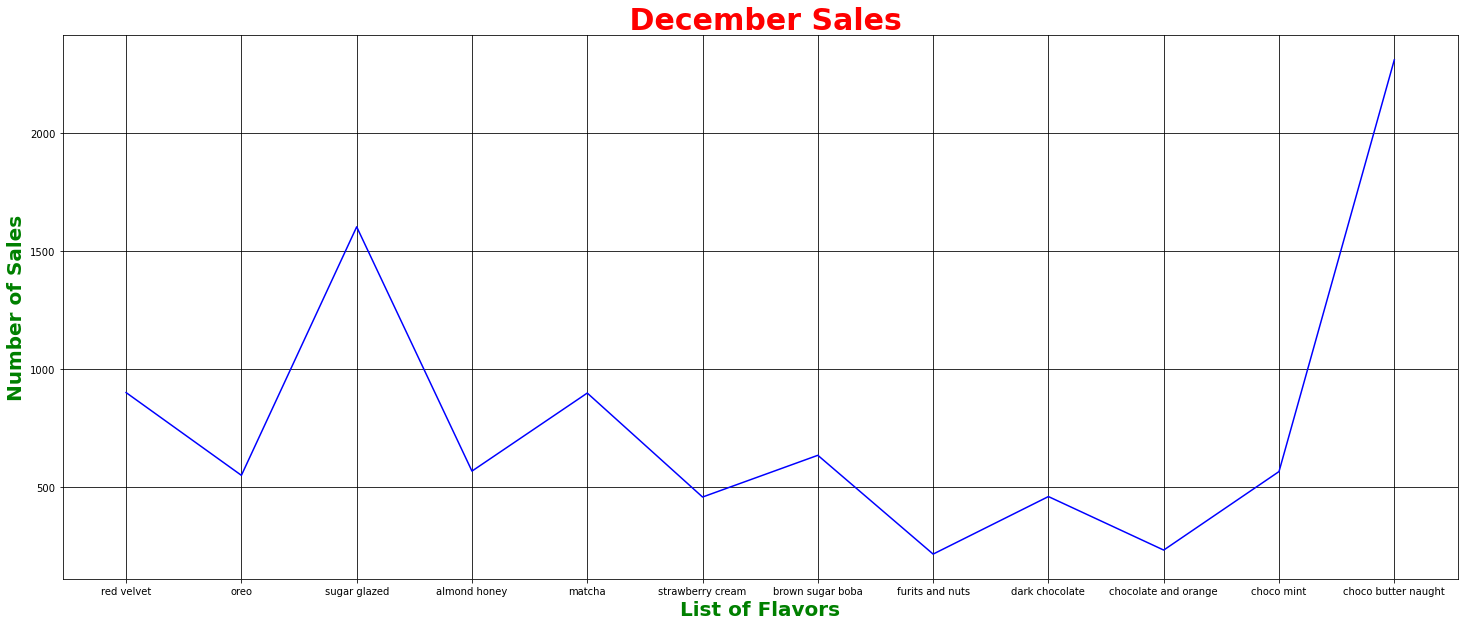

In [179]:
plt.figure(figsize=(25,10))
plt.title(' December Sales', fontdict={'fontweight':'bold','fontsize':30}, color= 'r') 

plt.plot(df_sales.flavor, df_sales.december, color = 'b') 
plt.xlabel('List of Flavors', fontdict={'fontweight':'bold','fontsize':20}, color='g')
plt.ylabel('Number of Sales', fontdict={'fontweight':'bold','fontsize':20},  color='g')

plt.grid(color = 'black')
plt.show()

# Monthly Sales

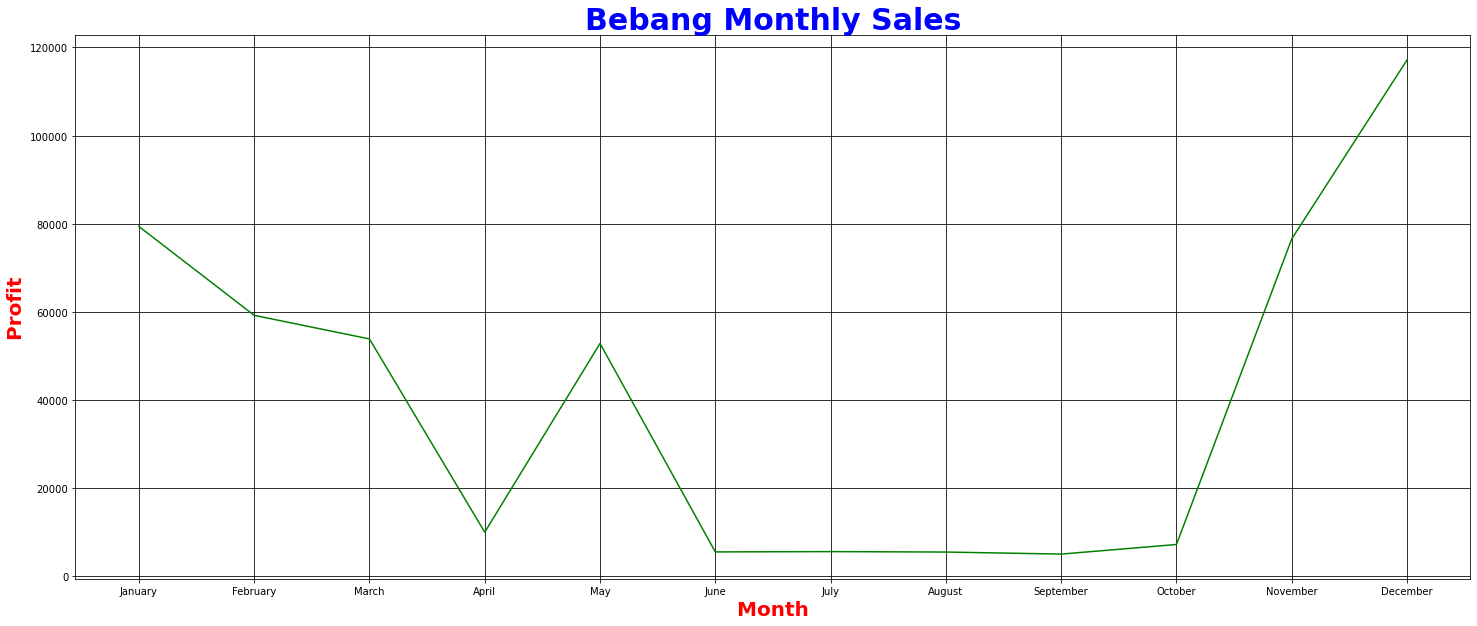

In [180]:
Bebang_monthly_sales = pd.read_csv('Bebang Monthly Sales.csv')

plt.figure(figsize=(25,10))

plt.title('Bebang Monthly Sales', fontdict={'fontweight':'bold','fontsize':30}, color= 'b')

plt.plot(Bebang_monthly_sales.month, Bebang_monthly_sales.sales, color= 'g')

plt.xlabel(' Month ', fontdict={'fontweight':'bold','fontsize':20}, color= 'r')
plt.ylabel(' Profit ', fontdict={'fontweight':'bold','fontsize':20}, color= 'r')

plt.grid(color = 'black')
plt.show()

In [185]:
monthly = pd.read_csv("bebang _monthly_sales.csv")
monthly

,Unnamed: 0,January,February,March,April,May,June,July,August,September,October,November,December
0,Profit,79131 Php,59201 Php,53850 Php,10001 Php,52824 Php,5527 Php,5598 Php,5498 Php,5034 Php,7213 Php,76548 Php,59208 Php


# Flavor Sales

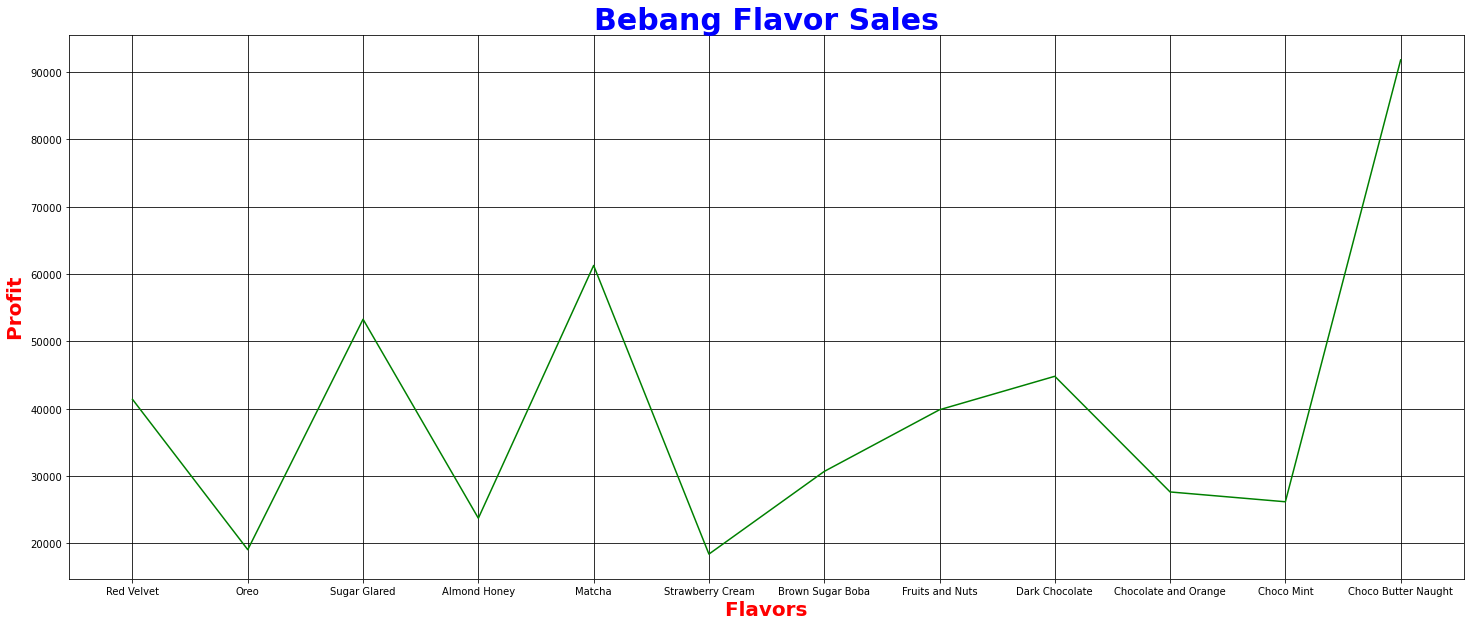

In [190]:
Bebang_Flavor_Sales = pd.read_csv('Bebang Flavor Sales.csv')

plt.figure(figsize=(25,10))
plt.title('Bebang Flavor Sales', fontdict={'fontweight':'bold','fontsize':30}, color= 'b')

plt.plot(Bebang_Flavor_Sales.flavors, Bebang_Flavor_Sales.sales, color= 'g')

plt.xlabel(' Flavors ', fontdict={'fontweight':'bold','fontsize':20}, color= 'r')
plt.ylabel(' Profit ', fontdict={'fontweight':'bold','fontsize':20}, color= 'r')

plt.grid(color = 'black')
plt.show()

In [183]:
sales = pd.read_csv("sales.csv")
sales

,flavors,Red Velvet,Oreo,Sugar Glared,Almond Honey,Matcha,Strawberry Cream,Brown Sugar Boba,Fruits and Nuts,Dark Chocolate,Chocolate and Orange,Choco Mint,Choco Butter Naught
0,sales,41370 php,19040 php,53260 php,23715 php,61245 php,18387 php,30660 php,39820 php,44790 php,27615 php,26156 php,91770 php


## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

In the given data, it can be seen that the highest profit was generated in the first quarter of the year. On the second and third quarter, the profit is slowly declining. But on the last quarter, on the month of November and December, the profit rose again. Moving on, the worst selling flavors are the choco butter naught, matcha, and sugar glazed. While the worst selling flavors are strawberry cream, oreo, and almond honey. With this data presented, Bebang will be easily informed regarding on how her business is doing. She will be able  to know which season or time of the year are weak in sales and profit and which flavors are not doing well. That way, she'll be able to work harder on business strategies and advertising. My recommendation for Bebang is that she should decrease the stocks of flavors with weak sales and profit and then slowly pull it out already if they're not still doing well in the following months. She could also add a twist on the other flavors and start new advertising strategies to further improve sales.